In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from os import fspath
%matplotlib inline
import seaborn as sns
import math
import plotly.express as px
import pandas as pd
import MDAnalysis as mda

import numpy as np
import plumed
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math
from sklearn.cluster import KMeans

In [3]:
# Devo prima creare un array con tutti i valori assunti dalla variabile collettiva
data_colvar0 = plumed.read_as_pandas("data/COLVAR.0")
data_colvar1 = plumed.read_as_pandas("data/COLVAR.1")
data_colvar2 = plumed.read_as_pandas("data/COLVAR.2")
data_colvar3 = plumed.read_as_pandas("data/COLVAR.3")

# Import data from the files containing the coordination number 
coord0 = plumed.read_as_pandas("coord/COORD_0")
coord1 = plumed.read_as_pandas("coord/COORD_1")
coord2 = plumed.read_as_pandas("coord/COORD_2")
coord3 = plumed.read_as_pandas("coord/COORD_3")

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3684/1917337666.py:2: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3684/1917337666.py:3: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3684/1917337666.py:4: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3684/1917337666.py:5: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3684/1917337666.py:8: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn/T/ipykernel_3684/1917337666.py:9: UserWarning:

cannot load PLUMED instance, conversions will not be available

/var/folders/hn/315sv5754l3bwzn1_mtrpscc0000gn

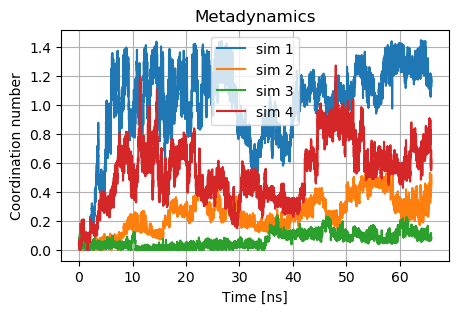

In [5]:
plt.rcParams["figure.figsize"] = (5, 3)
plt.plot(coord0["time"]*0.01, coord0["d1"], label="sim 1")
plt.plot(coord1["time"]*0.01, coord1["d1"], label="sim 2")
plt.plot(coord2["time"]*0.01, coord2["d1"], label="sim 3")
plt.plot(coord3["time"]*0.01, coord3["d1"], label="sim 4")
plt.grid()
plt.title("Metadynamics")
plt.ylabel("Coordination number")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

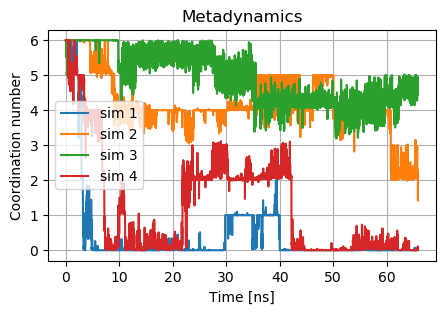

In [16]:
plt.plot(coord0["time"]*0.01, coord0["coord"], label="sim 1")
plt.plot(coord1["time"]*0.01, coord1["coord"], label="sim 2")
plt.plot(coord2["time"]*0.01, coord2["coord"], label="sim 3")
plt.plot(coord3["time"]*0.01, coord3["coord"], label="sim 4")
plt.grid()
plt.title("Metadynamics")
plt.ylabel("Coordination number")
plt.xlabel("Time [ns]")
plt.legend(loc="best")

In [4]:
# Attenzione: il COLVAR è campionato ad una frequenza diversa rispetto al COORD
# Il COORD è ricavato dalla traiettoria, che è campionata ad una frequenza di 10 ps, per questo motivo il 
# tempo massimo in COORD è 6586 e in COLVAR è 65860. Quindi dobbiamo dividere prima per 10, poi per 5.as_integer_ratio

# Devo trovare la maniera di estrarre i punti ogni 50 passi dal COLVAR. 
# Devo fare in modo che COLVAR finisca con un tempo che finisce in 0 (che quindi è anche presente in COORD)

# L'idea più semplice a questo punto è prendere le distanze salvate in COORD (e non su COLVAR)


# create the array containing all the values of the CV (called s)
labels_sim = np.concatenate((np.zeros(len(coord0["d1"])), np.ones(len(coord1["d1"])), 2*np.ones(len(coord2["d1"])), 3*np.ones(len(coord2["d1"]))), axis=None)
time = np.concatenate((coord0["time"], coord1["time"], coord2["time"], coord3["time"]), axis=None)
s = np.concatenate((coord0["d1"], coord1["d1"], coord2["d1"], coord3["d1"]), axis=None)
c = np.concatenate((coord0["coord"], coord1["coord"], coord2["coord"], coord3["coord"]), axis=None)

# Select the element below a threshold 
s_cut = []
c_cut = []
time_cut = []
labels_sim_cut = []
for i in range(len(s)):
    if s[i] < 1.0:
        s_cut.append(s[i])
        c_cut.append(c[i])
        time_cut.append(time[i])
        labels_sim_cut.append(labels_sim[i])

In [ ]:
# Each centroid defines one of the clusters. In this step, each data point is assigned 
# to its nearest centroid, which is based on the squared Euclidean distance.
# After this, the centroids are recomputed and updated. 


# Idea: I can obtain the coordination number from the four trajectories and then use this as second variable!

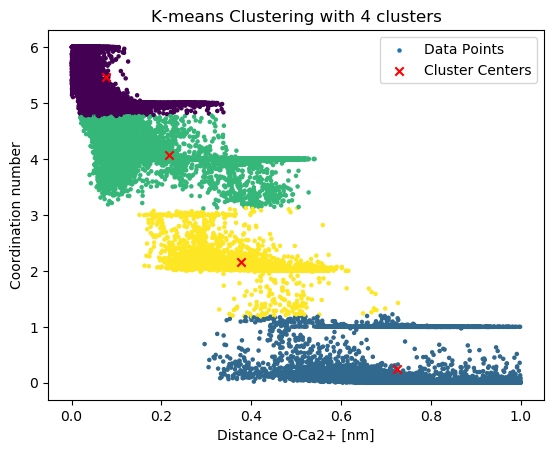

In [5]:
# Generate a two-dimensional array
data = []
for i in range(len(s_cut)):
    data.append([s_cut[i], c_cut[i]])

data = np.array(data)

# Specify the number of clusters (K)
num_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(data)

# Get cluster assignments and cluster centers
labels = kmeans.labels_
centers = kmeans.cluster_centers_

# Plot the data points and cluster centers
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', s=5, label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', label='Cluster Centers')
plt.title(f'K-means Clustering with {num_clusters} clusters')
plt.xlabel('Distance O-Ca2+ [nm]')
plt.ylabel('Coordination number')
plt.legend()
plt.show()

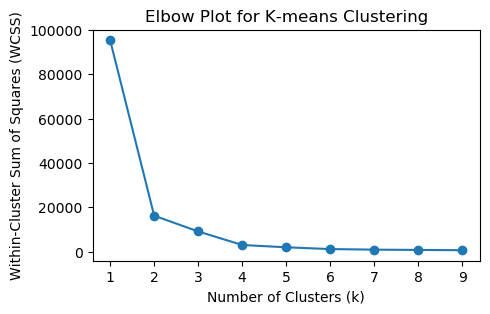

In [67]:
# WCSS (within-cluster sum of squares): it is defined as the sum of square distances between the centroids and each points.
# inertia_ : sum of squared distances of samples to their closest cluster center

wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [6]:
# Ora la domanda è: come posso rintracciare le configurazioni a partire dai centri?

# Assign each frame of your trajectory to the cluster whose center it is closest to. 
# This step helps categorize the trajectory frames into distinct clusters.

# Compute cluster centers and predict cluster index for each sample
labels = kmeans.fit_predict(data)

structures = []

# Identify representative configurations for each cluster
for cluster_label in range(4):

    # I get the positions of the frames belonging to the 0, 1, 2, 3 clusters.
    # cluster_indices changes dimensions during at each iteration of the loop
    cluster_indices = np.where(labels == cluster_label)[0]

    dist = [2]
    min = 1
    for i in range(1, len(cluster_indices)):
        # I take the square of the distances
        # I loop over the set of indices associated to a given cluster
        dist.append((data[cluster_indices][i][0] - centers[cluster_label][0])**2 + (data[cluster_indices][i][1] - centers[cluster_label][1])**2)
        if min > dist[i]:
            min = dist[i]
            ref = cluster_indices[i]

    structures.append(ref)
    #structures.append(np.argmin(dist))

In [9]:
structures

[3102, 17837, 4613, 19868]

# Identifying the structures

In [16]:
# Ok, ora ricorda che hai 4 simulazioni da cui prendere questi frames
structures

# Devo controllare che effettivamente 1 nm sia ragionevole come distanza per considerare lo ione nella pocket. 
# A me sembra ragionevole e anche una scelta conservativa. Ma ci sta, così differenziamo di più una configurazione 
# dall'altra. 

# Ora prendiamo s_cut e c_cut e vediamo se i valori sono compatibili:
s_cut[17837] - centers[1][0]
#c_cut[17837] - centers[1][1]

-0.021877368730079283

In [10]:
frames = []
for i in range(4):
    frames.append([time_cut[structures[i]], labels_sim_cut[structures[i]], s_cut[structures[i]], c_cut[structures[i]]])

In [11]:
# remember that the distances in traj_comp.xtc are captured every 10 ps,
# so for example, 546 actually corresponds to 5460 ps (or 5.46 ns)
frames

[[546.0, 1.0, 0.062571, 5.472518],
 [2128.0, 3.0, 0.722427, 0.25705100000000003],
 [2057.0, 1.0, 0.21430900000000003, 4.070136],
 [4159.0, 3.0, 0.381284, 2.154582]]

In [33]:
centers

array([[0.07557812, 5.47023842],
       [0.72417637, 0.24770379],
       [0.21675846, 4.07309051],
       [0.37683672, 2.15957368]])